# importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as nm

In [3]:
df = pd.read_csv('heart failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Spliting data set

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.[Learn More](https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn)

random_state as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.[Learn More](https://stackoverflow.com/questions/42191717/scikit-learn-random-state-in-splitting-dataset)

In [7]:
x = df.drop('DEATH_EVENT', axis =1);
y = df.DEATH_EVENT

In [8]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,stratify=y,random_state=20, test_size=.30)

In [21]:
xtrain.shape

(209, 12)

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rncl = RandomForestClassifier()

In [25]:
rncl.fit(xtrain,ytrain)

RandomForestClassifier()

## Prediction

In [26]:
pred = rncl.predict(xtest)

## Confusion Matrix

In [27]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve,plot_roc_curve

In [28]:
cm = confusion_matrix(ytest,pred)
cm

array([[54,  7],
       [ 9, 20]], dtype=int64)

Text(33.0, 0.5, 'Actual Values')

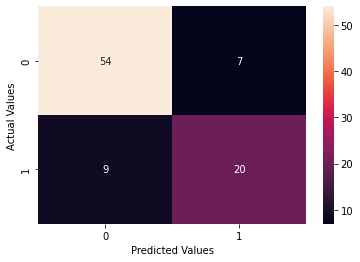

In [31]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [32]:
rncl.score(xtest,ytest)

0.8222222222222222

# Hyper Parameter Tuning / Optimization

# Randomized Search CV

In [33]:
from sklearn.model_selection import RandomizedSearchCV

### Linespace or Randint - better in Linespace

In [35]:
n_estimators = [int(x) for x in nm.linspace(start=100, stop=500, num=15)]
n_estimators

[100, 128, 157, 185, 214, 242, 271, 300, 328, 357, 385, 414, 442, 471, 500]

In [37]:
nm.random.randint(100,500,15)

array([486, 167, 302, 226, 450, 444, 330, 306, 369, 280, 276, 333, 221,
       339, 113])

In [42]:
#Update Parameters

n_estimators = [int(x) for x in nm.linspace(start=100, stop=500, num=15)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in nm.linspace(start=10, stop=100, num=15)]
min_samples_split = [2,4,5,6,7,9,10]
min_samples_leaf = [2,3,5,6,7,9,12]
criterion = ['entropy','gini']

grid={
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion' :  criterion
}
print(grid)

{'n_estimators': [100, 128, 157, 185, 214, 242, 271, 300, 328, 357, 385, 414, 442, 471, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 16, 22, 29, 35, 42, 48, 55, 61, 67, 74, 80, 87, 93, 100], 'min_samples_split': [2, 4, 5, 6, 7, 9, 10], 'min_samples_leaf': [2, 3, 5, 6, 7, 9, 12], 'criterion': ['entropy', 'gini']}


In [43]:
rncl2 = RandomForestClassifier()

In [44]:
rncv = RandomizedSearchCV(rncl2, grid, n_iter=200, cv=3)

In [45]:
rncv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 16, 22, 29, 35, 42,
                                                      48, 55, 61, 67, 74, 80,
                                                      87, 93, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 5, 6, 7, 9,
                                                             12],
                                        'min_samples_split': [2, 4, 5, 6, 7, 9,
                                                              10],
                                        'n_estimators': [100, 128, 157, 185,
                                                         214, 242, 271, 300,
                                            

In [46]:
result = pd.DataFrame(rncv.cv_results_)

In [47]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.349419,0.027387,0.027318,0.003658,214,2,9,log2,80,gini,"{'n_estimators': 214, 'min_samples_split': 2, ...",0.871429,0.800000,0.840580,0.837336,0.029251,145
1,0.720064,0.029467,0.191799,0.196844,442,4,9,log2,22,entropy,"{'n_estimators': 442, 'min_samples_split': 4, ...",0.885714,0.828571,0.826087,0.846791,0.027542,81
2,0.719417,0.084135,0.050675,0.006985,385,4,6,auto,16,entropy,"{'n_estimators': 385, 'min_samples_split': 4, ...",0.857143,0.814286,0.840580,0.837336,0.017646,153
3,0.807017,0.025154,0.064108,0.003932,500,6,2,log2,74,entropy,"{'n_estimators': 500, 'min_samples_split': 6, ...",0.857143,0.828571,0.840580,0.842098,0.011714,95
4,0.651514,0.009753,0.051724,0.002252,442,10,7,sqrt,80,gini,"{'n_estimators': 442, 'min_samples_split': 10,...",0.885714,0.828571,0.826087,0.846791,0.027542,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.408324,0.014978,0.033005,0.000005,271,4,7,sqrt,67,entropy,"{'n_estimators': 271, 'min_samples_split': 4, ...",0.885714,0.828571,0.826087,0.846791,0.027542,81
196,0.702664,0.034181,0.055003,0.000818,471,5,12,sqrt,93,gini,"{'n_estimators': 471, 'min_samples_split': 5, ...",0.871429,0.814286,0.840580,0.842098,0.023353,95
197,0.630331,0.008339,0.051993,0.000809,442,5,9,auto,22,entropy,"{'n_estimators': 442, 'min_samples_split': 5, ...",0.885714,0.814286,0.840580,0.846860,0.029497,68
198,0.565334,0.042151,0.042326,0.000953,357,4,9,log2,29,gini,"{'n_estimators': 357, 'min_samples_split': 4, ...",0.857143,0.828571,0.811594,0.832436,0.018795,184


### Best Score

In [48]:
rncv.best_score_

0.865976535541753

### Best parameters 

In [50]:
rncv.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 12,
 'max_features': 'log2',
 'max_depth': 61,
 'criterion': 'entropy'}

### Best parameters with Function

In [51]:
rncv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=61, max_features='log2',
                       min_samples_leaf=12, min_samples_split=7)

### Test on Best parameter

In [52]:
best = rncv.best_estimator_
best.score(xtest,ytest)

0.8333333333333334

In [53]:
best.score(x,y)

0.8729096989966555

# XGBoost Classifier

In [54]:
!pip install xgboost
import xgboost
from xgboost import XGBClassifier

You should consider upgrading via the 'c:\users\anik chakraborty\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [55]:
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)

[14:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\anik chakraborty\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
xgb.score(xtest,ytest)

0.8555555555555555

In [57]:
xgb.score(x,y)

0.9565217391304348